# <center>Part 1 - Warm-up</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
sns.set()
%matplotlib inline

# Task 1
The first task consists of fitting the following equation to a set of 50 x/y data points.<br>
*$y = a* log(x) + b$*

- Read data

In [2]:
data=pd.read_csv('task-1.csv')

In [3]:
data.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


- Plot data

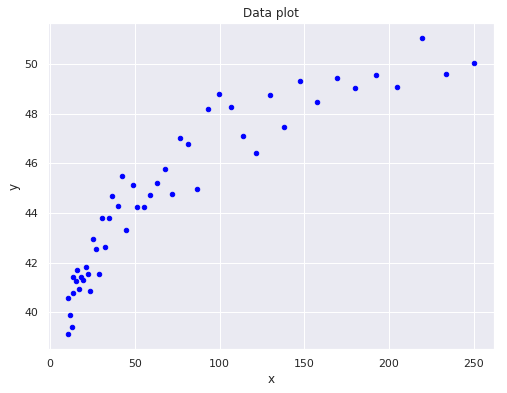

In [4]:
data.plot.scatter(x='x',y='y', title='Data plot',c='blue', figsize=(8,6));

- Fit the curve

In [5]:
# create an sklearn Linear regression object
model = LinearRegression()
# prepare x data, and reshape it from (50,) to (50,1)
x = data.x.values.reshape(-1,1)
x_log = np.log(x)
# prepare y data, and reshape it from (50,) to (50,1)
y = data.y.values.reshape(-1,1)
# fit the model
model.fit(x_log, y)
# calculate predictions for x data
y_pred = model.predict(x_log)

- Plot it

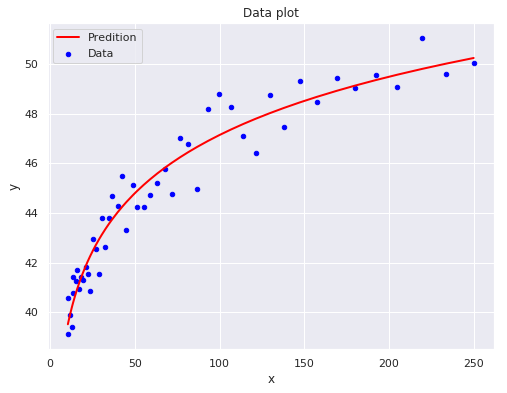

In [6]:
data.plot.scatter(x='x',y='y', title='Data plot',c='blue', figsize=(8,6), label='Data');
plt.plot(x, y_pred, color='red', linewidth=2, label='Predition');
plt.legend();

- Compute the $RSS$ and $R^2$ measures

In [7]:
RSS = np.sum(np.square(y - y_pred))
R2 = r2_score(y, y_pred)
print(f'RSS= {RSS}, R^2 = {R2}')

RSS= 31.842651752756762, R^2 = 0.9411567093138287


- Discuss the results, is it a good $R^2$ score?

The model explains 94% of the variance. It's a good $R^2$ for training data.

# Task 2

The second task consists of fitting a model to a set of data points that contains outliers.<br>
The goal is to try and compare different approaches to handle outliers. Use the train/test
split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the
following approaches
1. Fit a linear regression with the outliers
2. Fit a huber regression with the outliers
3. Fit a linear regression without the outliers


- Read the data and show first rows

In [8]:
data=pd.read_csv('task-2.csv')
data.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [9]:
data.shape

(1000, 4)

- prepare X and Y data

In [10]:
data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=0)
X_train = data_train.iloc[:,:-1]
Y_train = data_train.y
X_test = data_test.iloc[:,:-1]
Y_test = data_test.y

In [11]:
# this function fits a model, shows it's MAE and return it
def fit_model(model,X_train,Y_train,X_test, Y_test):
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    MAE_train = mean_absolute_error(Y_train, y_train_pred)
    MAE_test = mean_absolute_error(Y_test, y_test_pred)

    print (f'Train : MAE = {MAE_train}')
    print (f'Test : MAE = {MAE_test}')
    return [MAE_train, MAE_test]

1. Fit a linear regression with the outliers

In [12]:
lr = fit_model(LinearRegression(), X_train,Y_train,X_test, Y_test)

Train : MAE = 119.66641210758226
Test : MAE = 104.78843301492125


2. Fit a huber regression with the outliers

In [13]:
huber = fit_model(HuberRegressor(), X_train,Y_train,X_test, Y_test)

Train : MAE = 111.87059704913405
Test : MAE = 83.90812414556166


3. Fit a linear regression without the outliers

In [14]:
outliers_flag = (np.abs(zscore(X_train)) > 3).any(axis=1)
no_lr = fit_model(LinearRegression(), X_train[~outliers_flag],Y_train[~outliers_flag],X_test, Y_test)

Train : MAE = 67.40532322054833
Test : MAE = 71.05466142498531


The Following table resumes performance of each model in test and train data

In [15]:
tab = pd.DataFrame([lr,huber,no_lr], columns = ['MAE_train', 'MAE_test'], index=['Linear Regression', 'Huber Regression', 'Linear Regression Without Outliers'])
tab

,MAE_train,MAE_test
Linear Regression,119.666412,104.788433
Huber Regression,111.870597,83.908124
Linear Regression Without Outliers,67.405323,71.054661


We can see that The linear regression without outliers and huber regression models perform better than the linear regression with outliers. The MAE is lower for these models.